In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('..')

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [6]:
trainset_sampled = _subsample_by_classes(trainset, [0,1,2,3,4,5,6,7,8,9], [100]*10)

number of examples with label '0': 100
number of examples with label '1': 100
number of examples with label '2': 100
number of examples with label '3': 100
number of examples with label '4': 100
number of examples with label '5': 100
number of examples with label '6': 100
number of examples with label '7': 100
number of examples with label '8': 100
number of examples with label '9': 100


In [8]:
# JSON file
with open ('outputs/mnist/Percy_mnist_devId_1_2022-08-09-13-23-43.json', "r") as f:
     data = json.loads(f.read())


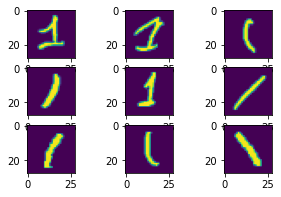

In [10]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data['helpful'][i]][0])

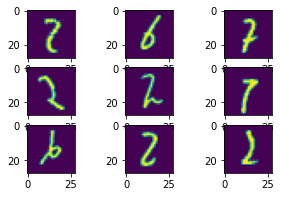

In [12]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data['harmful'][i]][0])

/home/xiaochen/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:682: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.array(x, subok=True, copy=copy)
/home/xiaochen/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:682: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

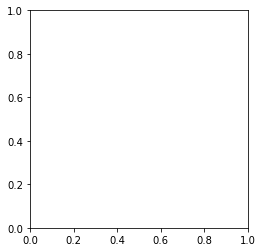

In [14]:
plt.imshow([trainset[data['helpful'][10]][0],trainset[data['helpful'][13]][0]])

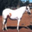

In [36]:
trainset[data['harmful'][15]][0]